# SVM Binary Classification with K-Fold Cross Validation

### Part a)

In [23]:
import pandas as pd
import numpy as np
import os

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [24]:
data = pd.read_csv("./dataset_ml_heart.txt", delimiter="\t")

data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,T
0,63,1,3,145,233,1,0,150,0.0,2.3,0,0,1,True
1,37,1,2,130,250,0,1,187,0.0,3.5,0,0,2,True
2,41,0,1,130,204,0,0,172,NaN,1.4,2,0,2,True
3,56,1,1,120,236,0,1,178,0.0,0.8,2,0,2,True
4,57,0,0,120,354,0,1,163,1.0,0.6,2,0,2,True


In [25]:
data.shape

(303, 14)

In [26]:
data.isna().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    2
J    0
K    0
L    0
M    0
T    1
dtype: int64

In [27]:
data = data.dropna(axis=0)
data["T"] = pd.to_numeric(data["T"])
data.isna().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
T    0
dtype: int64

In [28]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data

,A,B,C,D,E,F,G,H,I,J,K,L,M,T
0,0.708333,1.0,1.000000,0.481132,0.002637,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.003056,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.562500,1.0,0.333333,0.245283,0.002711,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
3,0.583333,0.0,0.000000,0.245283,0.005619,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
4,0.583333,1.0,0.000000,0.433962,0.001627,0.0,0.5,0.587786,0.0,0.064516,0.5,0.00,0.333333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.625000,1.0,0.000000,0.660377,0.001232,1.0,0.0,0.145038,0.0,0.161290,0.5,0.50,0.333333,0.0
296,0.583333,0.0,0.000000,0.433962,0.002834,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
297,0.333333,1.0,1.000000,0.150943,0.003401,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
298,0.583333,1.0,0.000000,0.339623,0.000123,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


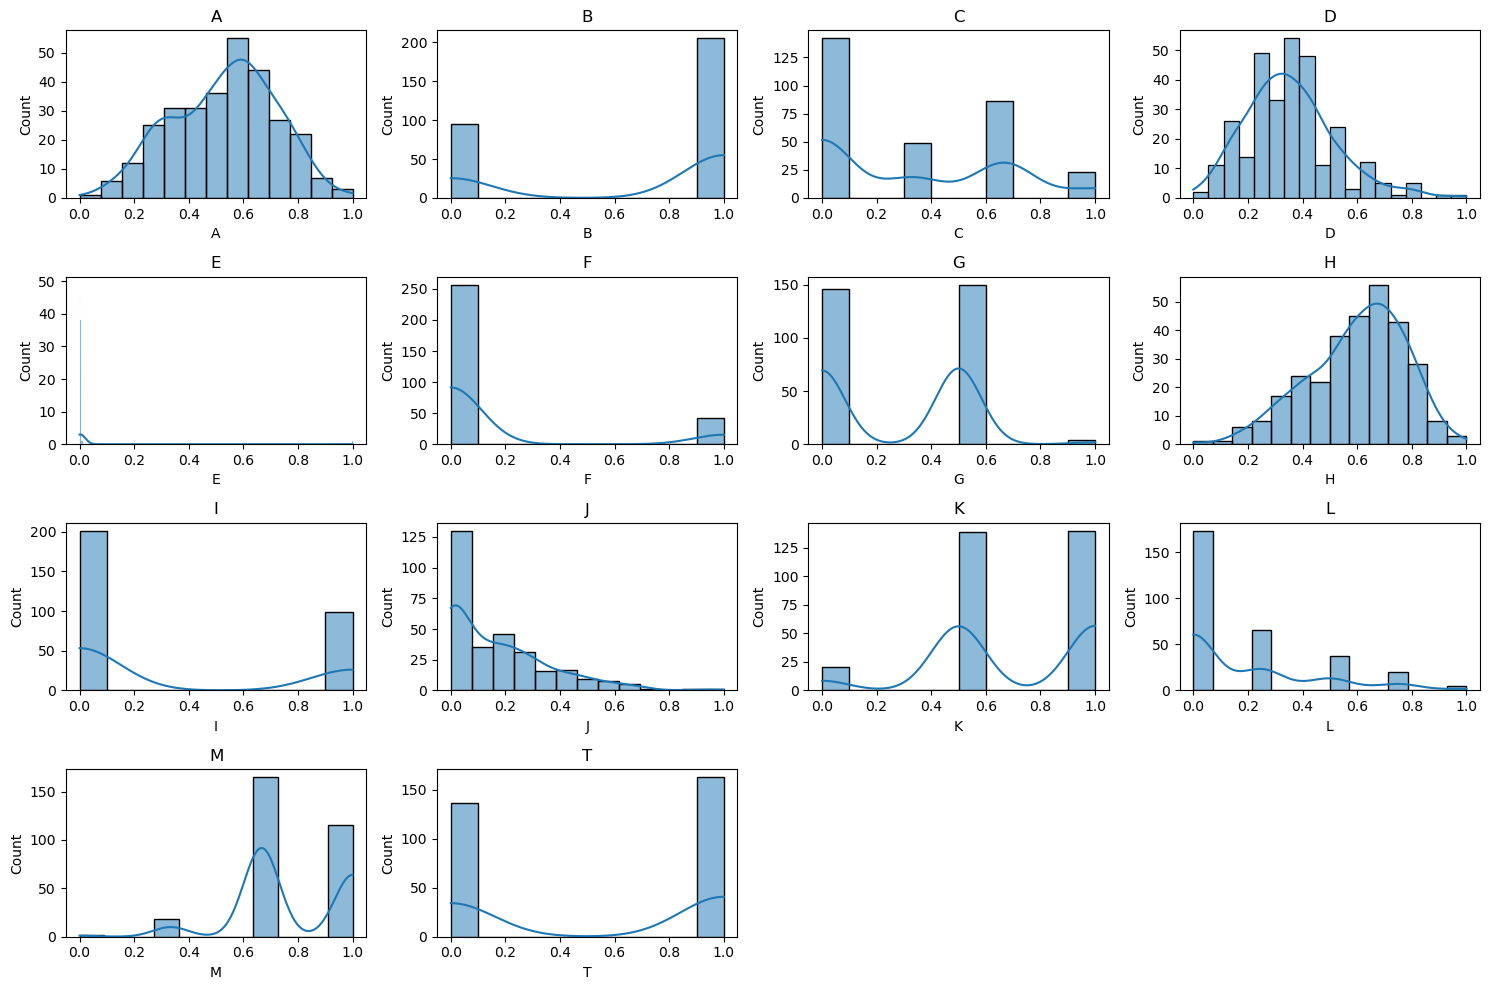

In [29]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(15, 10))
axs = axs.flatten()

for i, column in enumerate(data.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(data=data, x=column, kde=True)
    axs[i].set_title(column)

# Removing empty subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

<Axes: >

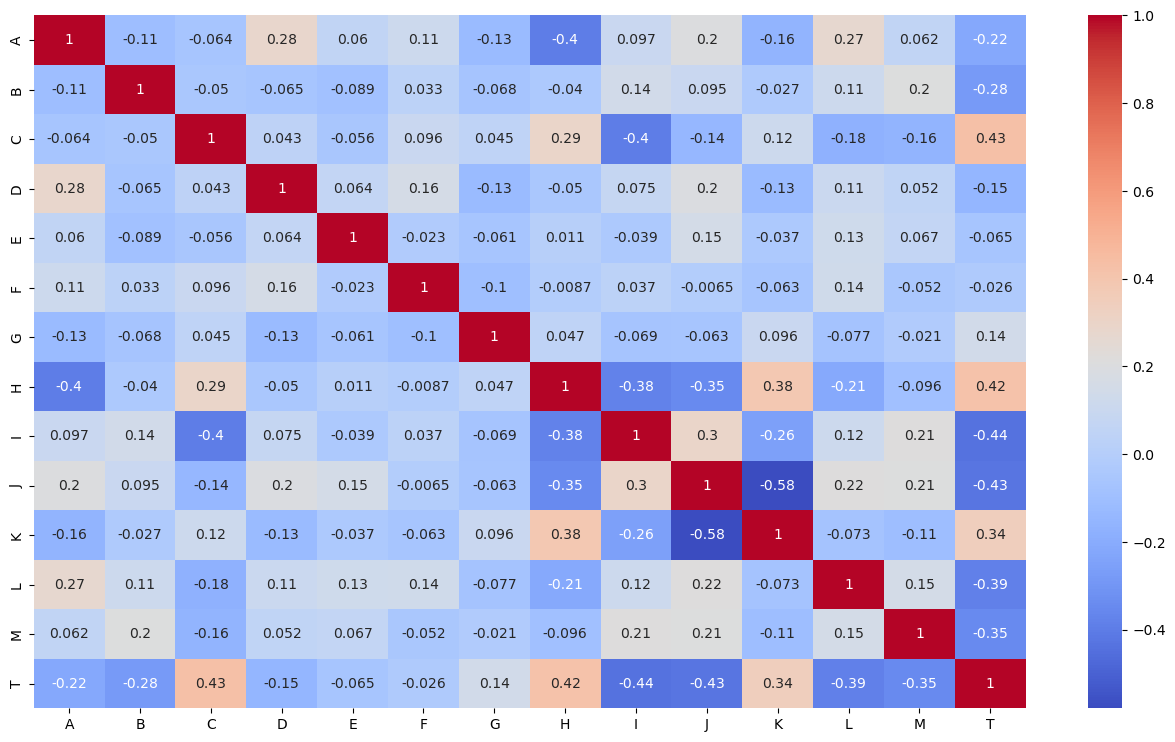

In [30]:
correlation_matrix = data.corr()

plt.figure(figsize=(16,9))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [31]:
X = data.iloc[:, :-1]
y = data["T"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [36]:
svm = SVC()

svm.fit(X_train, y_train)

val_predictions = svm.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy*100:.5f}%")

test_predictions = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy*100:.5f}%")

Validation Accuracy: 85.00000%
Test Accuracy: 88.33333%


In [50]:
svm_parameters = [
        {'kernel': ['linear'], 'C': [0.1, 0.2, 0.5, 1, 2, 5, 10, 100], 'max_iter': [1000, 10000, 100000, 1000000, 10000000], 'probability': [False]},
        {'kernel': ['poly'], 'C': [0.1, 0.2, 0.5, 1, 2, 5, 10, 100], 'max_iter': [1000, 10000, 100000, 1000000, 10000000], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto'], 'probability': [False]},
        {'kernel': ['rbf'], 'C': [0.1, 0.2, 0.5, 1, 2, 5, 10, 100], 'max_iter': [1000, 10000, 100000, 1000000, 10000000], 'gamma': ['scale', 'auto'], 'probability': [False]},
        {'kernel': ['sigmoid'], 'C': [0.1, 0.2, 0.5, 1, 2, 5, 10, 100], 'max_iter': [1000, 10000, 100000, 1000000, 10000000], 'gamma': ['scale', 'auto'], 'probability': [False]}
    ]

# Re-spliting the data for Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid = GridSearchCV(SVC(), svm_parameters, n_jobs=-1, verbose=1, cv=5)

grid.fit(X_train, y_train)

improved_svm = grid.best_estimator_

print(f"SVM Best Parameters: {grid.best_params_}")

improved_val_predictions = improved_svm.predict(X_val)
improved_val_accuracy = accuracy_score(y_val, improved_val_predictions)
print(f"Validation Accuracy: {val_accuracy*100:.5f}%")

improved_test_predictions = improved_svm.predict(X_test)
improved_test_accuracy = accuracy_score(y_test, improved_test_predictions)
print(f"Test Accuracy: {test_accuracy*100:.5f}%")


Fitting 5 folds for each of 440 candidates, totalling 2200 fits
SVM Best Parameters: {'C': 0.5, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 1000, 'probability': False}
Validation Accuracy: 85.00000%
Test Accuracy: 88.33333%


In [46]:
def handle_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Defining bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

# Handle outliers in the features
data_no_outliers = handle_outliers(data.drop("T", axis=1))
data_no_outliers["T"] = data.loc[data_no_outliers.index, "T"]  # Re-adding the target column


In [49]:
X_train, X_test, y_train, y_test = train_test_split(data_no_outliers.drop("T", axis=1), data_no_outliers["T"], test_size=0.2, random_state=42)

In [51]:
grid = GridSearchCV(SVC(), svm_parameters, n_jobs=-1, verbose=1, cv=5)

grid.fit(X_train, y_train)

improved_svm = grid.best_estimator_

improved_test_predictions = improved_svm.predict(X_test)
improved_test_accuracy = accuracy_score(y_test, improved_test_predictions)
print(f"Test Accuracy: {test_accuracy*100:.5f}%")

Fitting 5 folds for each of 440 candidates, totalling 2200 fits
Test Accuracy: 88.33333%
